In [47]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import model_from_json
%matplotlib inline

In [48]:
# ----- LOAD SAVED MODEL -----
json_file = open('model.json', 'r')     
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk.")

Loaded model from disk.


In [49]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 308 images belonging to 17 classes.


*select the image which you want to predict similar images*

In [ ]:
import numpy as np
import keras.utils as image
test_image = image.load_img('dataset_category/stripes/851505681.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 82ms/step


{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [64]:
index = np.where(result[0] == 1)[0][0]
index

15

In [53]:
predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
predicted_category

'plain'

In [72]:
folder_dir = "dataset_category/plain"
for filename in os.listdir(folder_dir):
    test_image = image.load_img(os.path.join(folder_dir, filename),
                                target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = loaded_model.predict(test_image)
    index = np.where(result[0] == 1)[0][0]
    predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
    print(filename, predicted_category)

1/1 [==============================] - 0s 45ms/step
851505459.jpg plain
1/1 [==============================] - 0s 45ms/step
851505461.jpg stripes
1/1 [==============================] - 0s 56ms/step
851505464.jpg stripes
1/1 [==============================] - 0s 44ms/step
851505465.jpg stripes
1/1 [==============================] - 0s 35ms/step
851505467.jpg animal
1/1 [==============================] - 0s 42ms/step
851505469.jpg plain
1/1 [==============================] - 0s 39ms/step
851505470.jpg stripes
1/1 [==============================] - 0s 39ms/step
851505473.jpg floral
1/1 [==============================] - 0s 47ms/step
851505474.jpg plain
1/1 [==============================] - 0s 41ms/step
851505479.jpg plain
1/1 [==============================] - 0s 40ms/step
851505481.jpg plain
1/1 [==============================] - 0s 38ms/step
851505482.jpg plain
1/1 [==============================] - 0s 41ms/step
851505486.jpg plain
1/1 [==============================] - 0s 41ms/step
85

IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
path = 'dataset_category/'+ predicted_category+'/'
extension = '*.jpg'
path+extension

'dataset_category/plain/*.jpg'

In [55]:
result = [i for i in glob.glob(path+extension)]
# print(result)
len(result) # length of array which contains the path to similar images

126

In [56]:
result[0]

'dataset_category/plain\\851505459.jpg'

In [57]:
img = cv2.imread(result[0])

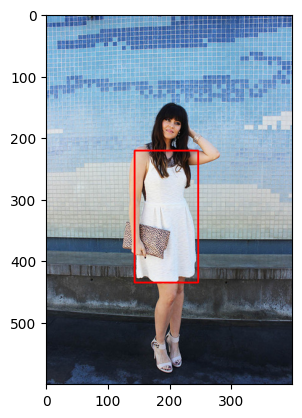

In [58]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [59]:
images = result[1:10]

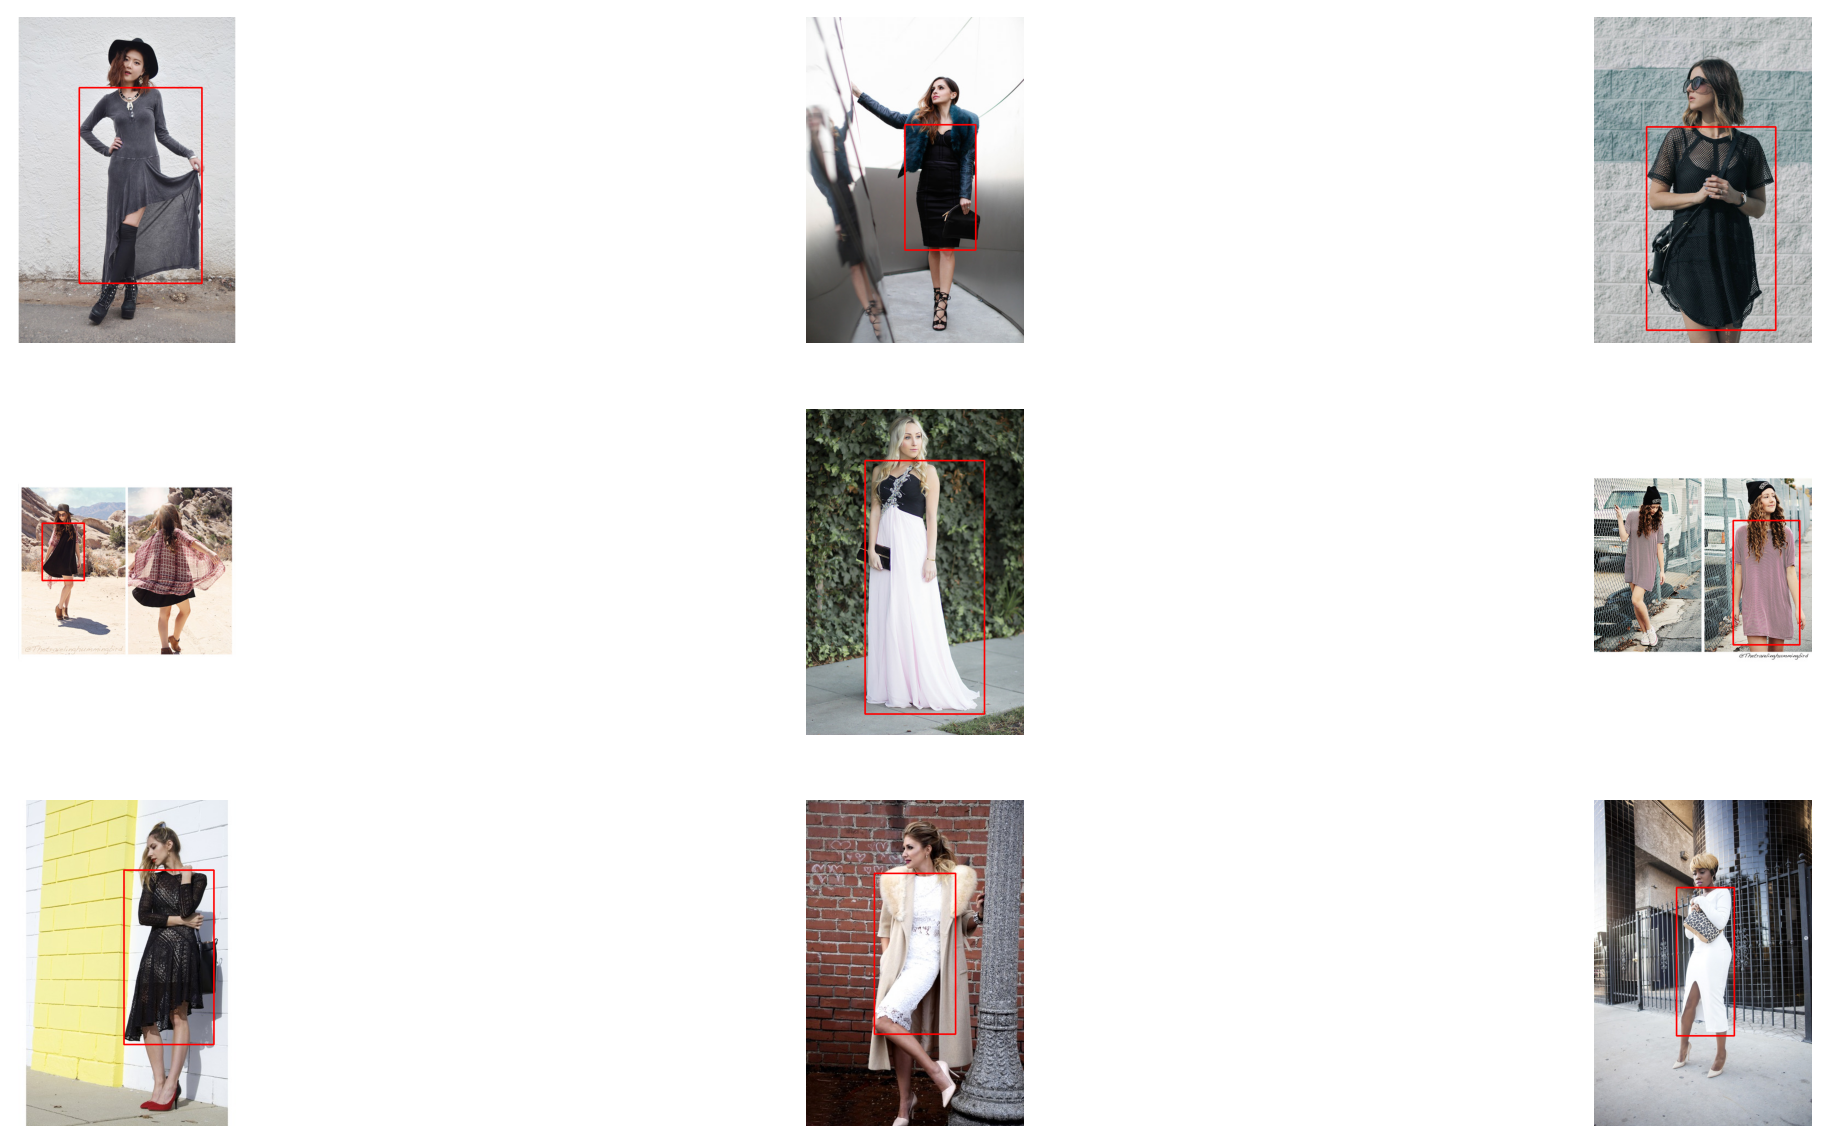

In [60]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8), dpi=180, facecolor='w', edgecolor='k')
for i, image in enumerate(images, start=1):
    image_array = cv2.imread(image)
    
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    plt.subplot(330+i)
    plt.axis('off')
    plt.imshow(image_array, cmap=plt.get_cmap('gray'))

plt.show()